In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Imputer on Numerical

In [2]:
df = pd.read_csv("/home/yash/Downloads/Titanic.csv",usecols = ["Age","Fare","Survived"])

In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
x = df.drop(columns = ["Survived"])
y = df["Survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [5]:
x_train["Age_Imputed"] = x_train["Age"] 
x_test["Age_Imputed"] = x_test["Age"]

In [6]:
missing_train = x_train["Age"].isnull().sum()
missing_test = x_test["Age"].isnull().sum()
print("Missing Values in x_train : ",missing_train,"\nMissing Values in x_test  :  ",missing_test)

Missing Values in x_train :  133 
Missing Values in x_test  :   44


In [7]:
a = x_train["Age"].dropna().sample(missing_train,replace = True,random_state = 0).values # Genarate 133(x_train["Age"].isnull().sum() = 133) random values from x_train for put in x_train for remove missing values
b = x_test["Age"].dropna().sample(missing_test,replace = True,random_state = 0).values # Same as train genarate 44(x_train["Age"].isnull().sum() = 44) random values

In [8]:
x_train.loc[x_train["Age_Imputed"].isnull(),"Age_Imputed"] = a # Replace x_train["Age_Imputed"].isnull() Rows from the "Age_Imputed" Collumn by a  
x_test.loc[x_test["Age_Imputed"].isnull(),"Age_Imputed"] = b   # df.loc[ rows , columns ] & same as for test

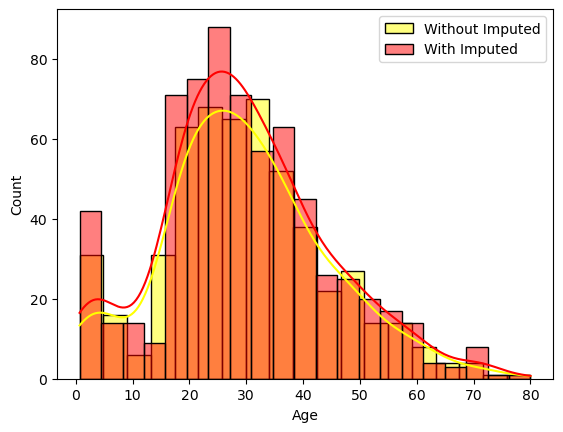

In [9]:
sns.histplot(x_train["Age"],label = "Without Imputed",kde = True,color = "Yellow")
sns.histplot(x_train["Age_Imputed"],label = "With Imputed",kde = True, color = "Red")

plt.legend()
plt.show()

In [10]:
x_train.cov()

,Age,Fare,Age_Imputed
Age,209.901939,81.025557,209.901939
Fare,81.025557,2563.601583,63.995209
Age_Imputed,209.901939,63.995209,218.349359


<Axes: >

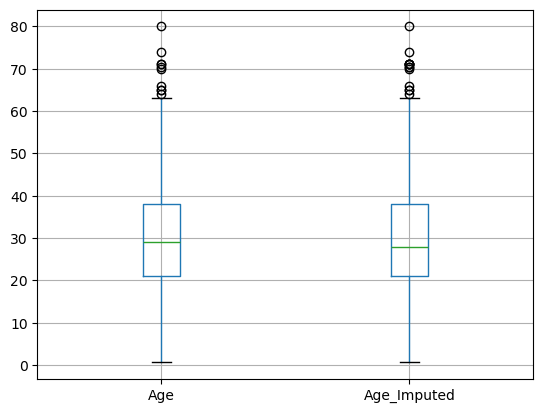

In [11]:
x_train[["Age","Age_Imputed"]].boxplot()

### Imputer on Catagorical

In [12]:
data = pd.read_csv("/home/yash/Downloads/train.csv",usecols = ["GarageQual","FireplaceQu","SalePrice"])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [14]:
X = data
Y = data["SalePrice"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0)

In [15]:
X_train["FireplaceQu_Imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_Imputed"]  = X_test["FireplaceQu"]

X_train["GarageQual_Imputed"]  = X_train["GarageQual"]
X_test["GarageQual_Imputed"]   = X_test["GarageQual"]

X_train.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
1292,NaN,TA,107500,NaN,TA
1018,TA,TA,160000,TA,TA
1213,NaN,TA,145000,NaN,TA
1430,Gd,TA,192140,Gd,TA
810,Fa,TA,181000,Fa,TA


In [16]:
# Find number of missing values of FireplaceQu and GarageQual in X_train and X_test 

In [17]:
Missing_train_FireplaceQu = X_train["FireplaceQu_Imputed"].isnull().sum()
Missing_test_FireplaceQu  = X_test["FireplaceQu_Imputed"].isnull().sum()

In [18]:
Missing_train_GarageQual = X_train["GarageQual_Imputed"].isnull().sum()
Missing_test_GarageQual  = X_test["GarageQual_Imputed"].isnull().sum()

In [19]:
# Take Sample value for put in X_train and X_test

In [20]:
A_FireplaceQu = X_train["FireplaceQu_Imputed"].dropna().sample(Missing_train_FireplaceQu,replace = True).values
B_FireplaceQu = X_test["FireplaceQu_Imputed"].dropna().sample(Missing_test_FireplaceQu,replace = True).values

A_GarageQual = X_train["GarageQual_Imputed"].dropna().sample(Missing_train_GarageQual,replace = True).values
B_GarageQual = X_test["GarageQual_Imputed"].dropna().sample(Missing_test_GarageQual,replace = True).values


In [21]:
# Put Sample Values 

In [22]:
X_train.loc[X_train["FireplaceQu_Imputed"].isnull(),["FireplaceQu_Imputed"]] = A_FireplaceQu
X_test.loc[X_test["FireplaceQu_Imputed"].isnull(),["FireplaceQu_Imputed"]] = B_FireplaceQu

X_train.loc[X_train["GarageQual_Imputed"].isnull(),["GarageQual_Imputed"]] = A_GarageQual
X_test.loc[X_test["GarageQual_Imputed"].isnull(),["GarageQual_Imputed"]] = B_GarageQual

In [23]:
X_train.sample(5,random_state = 0)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_Imputed,GarageQual_Imputed
573,TA,TA,170000,TA,TA
1303,NaN,TA,232000,Gd,TA
1080,NaN,TA,145000,Gd,TA
1373,Gd,TA,466500,Gd,TA
157,Gd,TA,269500,Gd,TA


In [24]:
temp1 = pd.concat([
    X_train["GarageQual"].value_counts() / len(X_train["GarageQual"].dropna())*100,
    X_train["GarageQual_Imputed"].value_counts() / len(X_train)*100
],axis = 1) # it's return Percentage of each category before imputation and after imputation in GarageQual

# s1 = pd.Series([10, 20, 30])
# s2 = pd.Series([40, 50, 60])
# pd.concat([s1, s2], axis=1)
# 
#Output :-  0	  1
#          10    40
#          20    50
#          30    60
# side-by-side → axis = 1
# one below another → axis = 0

In [25]:
temp1

,count,count
TA,94.995188,95.251142
Fa,3.657363,3.470320
Gd,0.866218,0.821918
Po,0.288739,0.273973
Ex,0.192493,0.182648


In [26]:
temp2 = pd.concat([
    X_train["FireplaceQu"].value_counts() / len(X_train["FireplaceQu"].dropna())*100,
    X_train["FireplaceQu_Imputed"].value_counts() / len(X_train)*100
],axis = 1)

temp2

,count,count
Gd,47.909408,49.589041
TA,41.289199,40.730594
Fa,4.878049,4.109589
Ex,3.135889,3.196347
Po,2.787456,2.374429


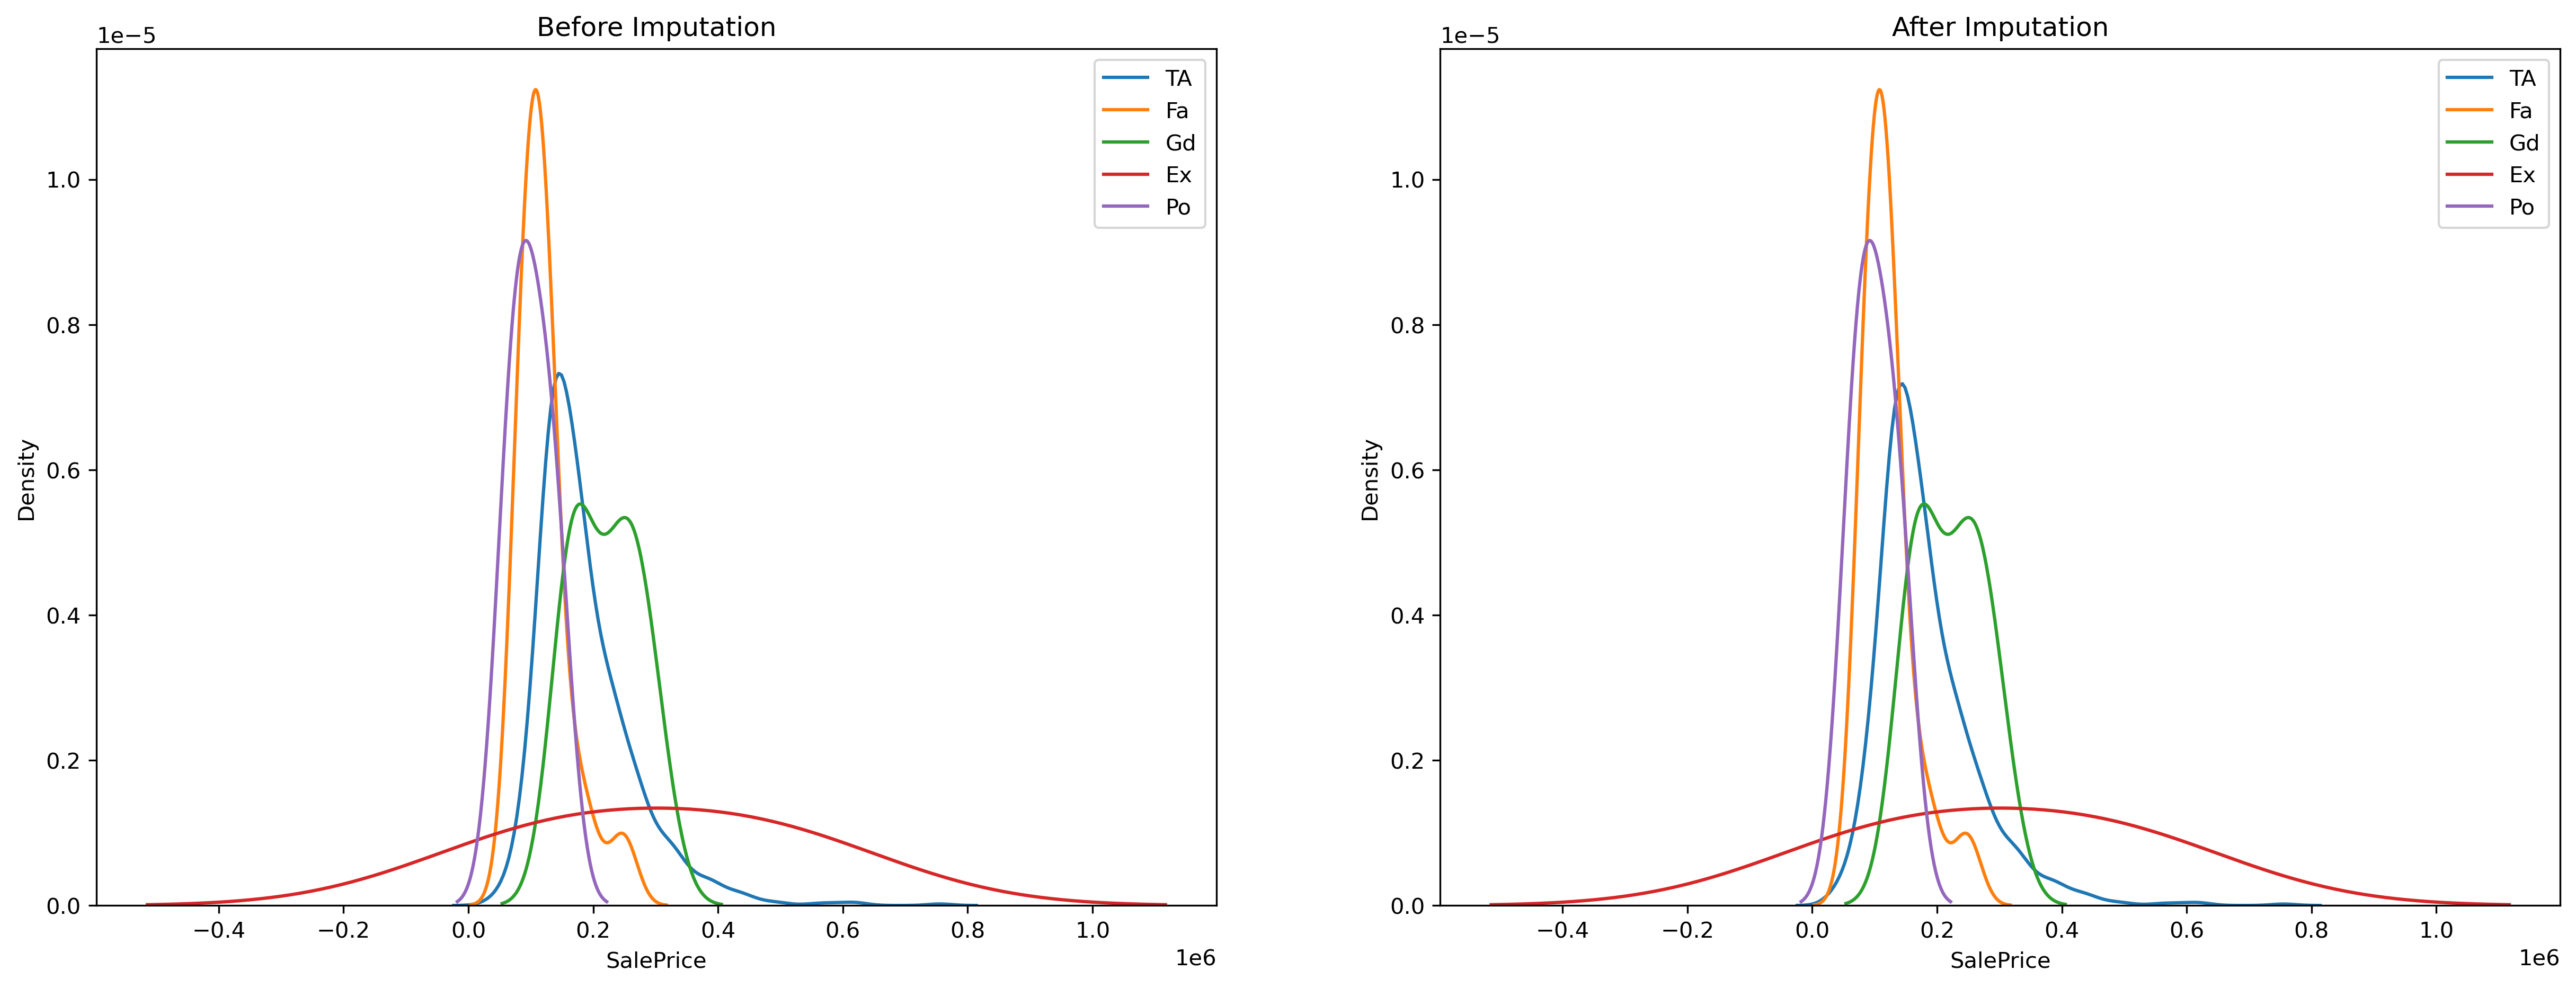

In [27]:
plt.figure(figsize = (20,7),dpi = 300)

plt.subplot(1,2,1)
plt.title("Before Imputation")

for category in X_train["GarageQual"].dropna().unique():
    sns.kdeplot(X_train[X_train["GarageQual"] == category]["SalePrice"],label = category)
plt.legend()    
    
plt.subplot(1,2,2)
plt.title("After Imputation")

for category in X_train["GarageQual_Imputed"].unique():
    sns.kdeplot(X_train[X_train["GarageQual_Imputed"] == category]["SalePrice"],label = category)
plt.legend()    

plt.show()

# This code shows SalePrice distributions before imputation and after imputation for each FireplaceQu category

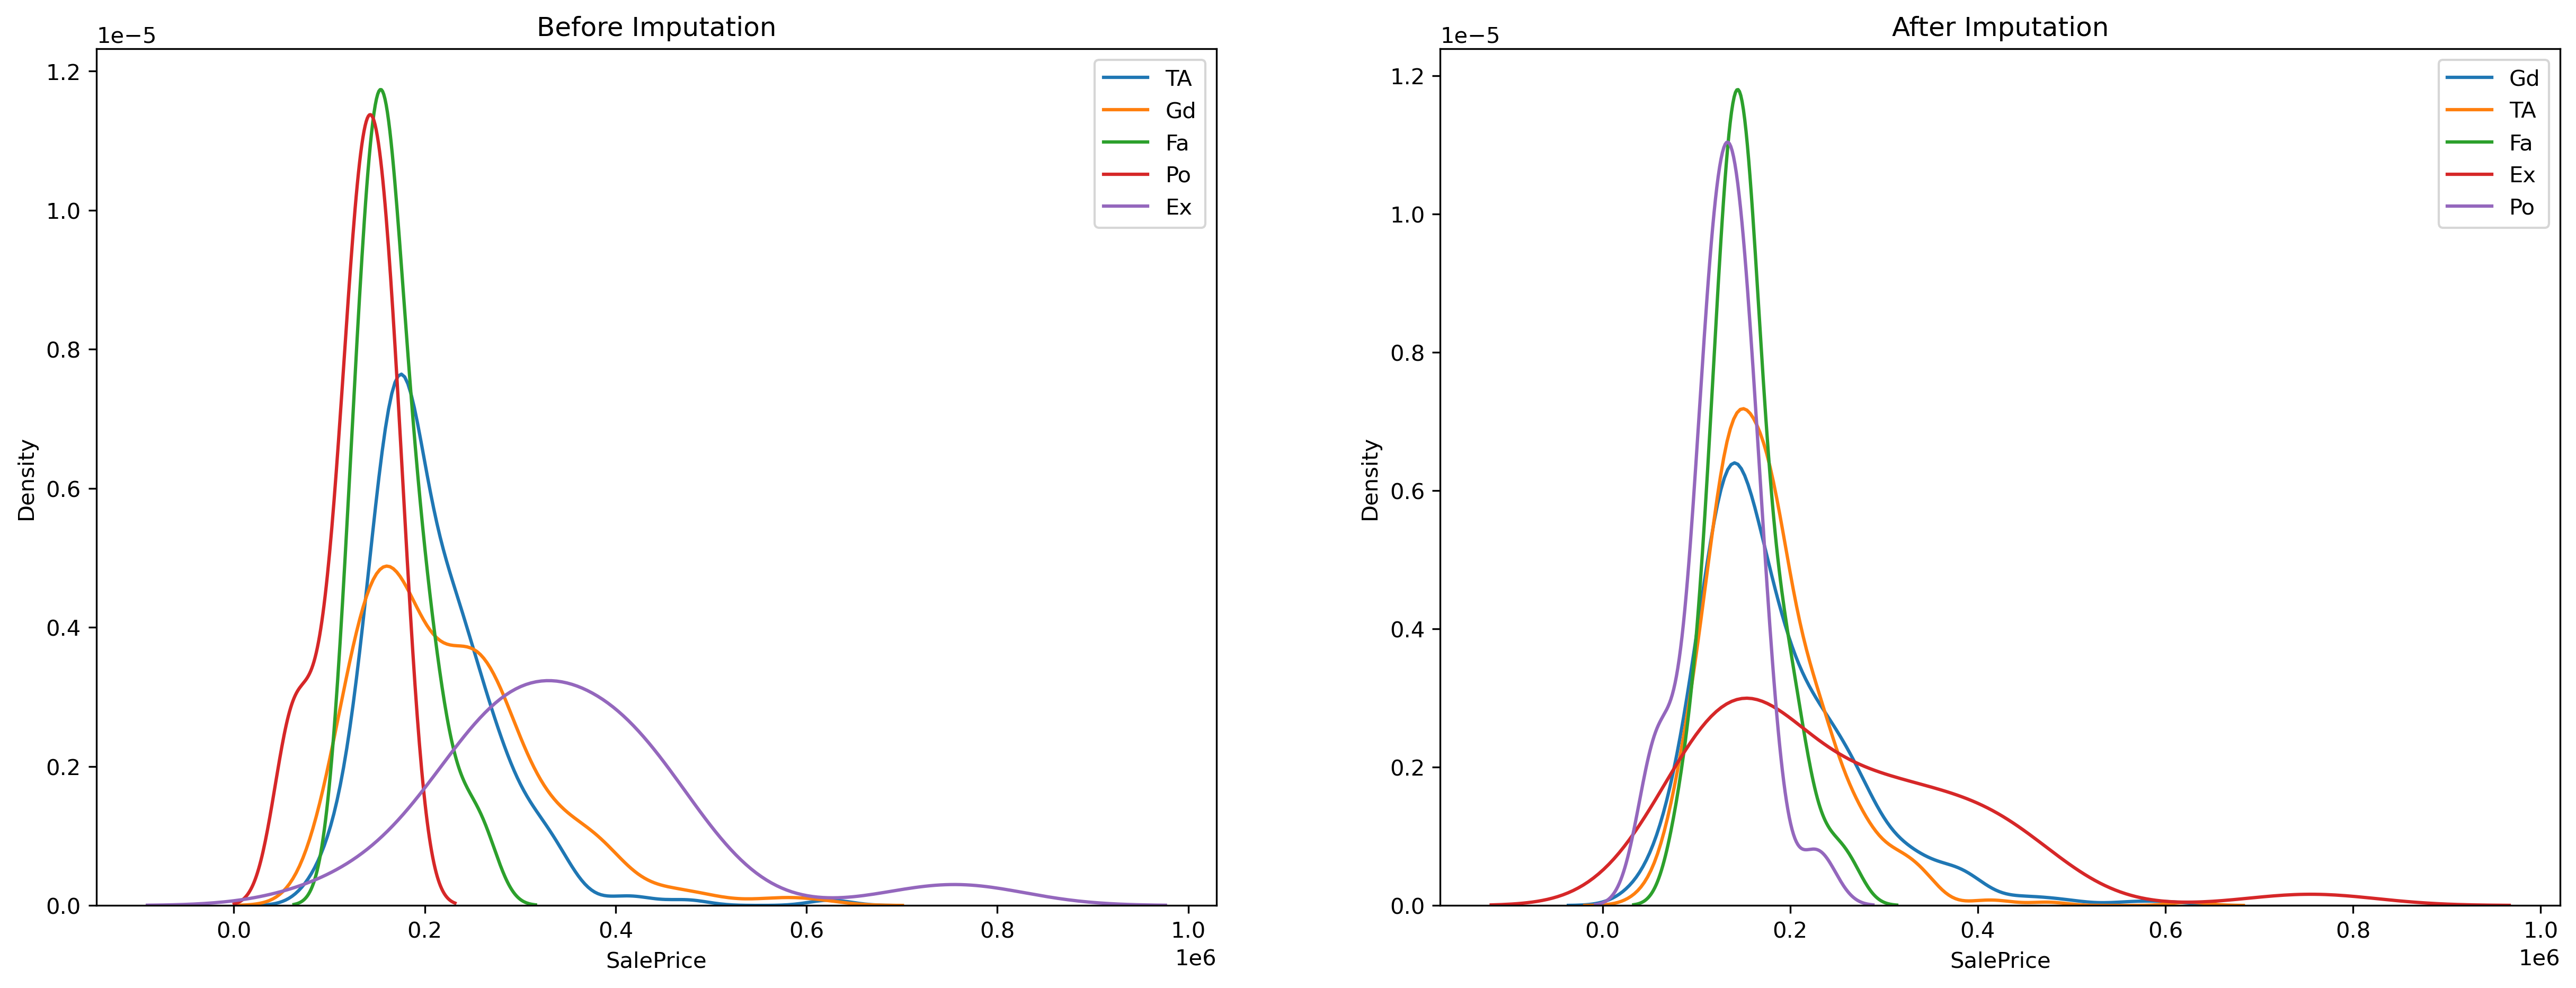

In [28]:
plt.figure(figsize = (20,7),dpi = 300)

plt.subplot(1,2,1)
plt.title("Before Imputation")

for category in X_train["FireplaceQu"].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu"] == category]["SalePrice"],label = category)
plt.legend()    

plt.subplot(1,2,2)
plt.title("After Imputation")

for category in X_train["FireplaceQu_Imputed"].unique():
    sns.kdeplot(X_train[X_train["FireplaceQu_Imputed"] == category]["SalePrice"],label = category)
plt.legend()

plt.show()